<a href="https://colab.research.google.com/github/sammatuba/AI-NLP-Codecamp/blob/master/Sentiment_Analysis_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords

import nltk
import random



In [0]:
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
stopwords = stopwords.words("english")

In [0]:
print(movie_reviews.categories())

['neg', 'pos']


In [0]:
reviews = []
for label in movie_reviews.categories():
  for revId in movie_reviews.fileids(label):
    reviews.append((list(movie_reviews.words(revId)), label))

In [0]:
print(review[0])

In [0]:
allowed = ['N','J']
allwords = []
finalData = []

for review in reviews:
  text = review[0]
  text_tags = nltk.pos_tag(text)
  filteredText = []
  for word in text_tags:
    if word[1][0] in allowed and word[0].isalpha() and len(word[0]) > 1:
      allwords.append(word[0].lower())
      filteredText.append(word[0].lower())
  finalData.append((filteredText, review[1]))

In [0]:
allwords = nltk.FreqDist(allwords)

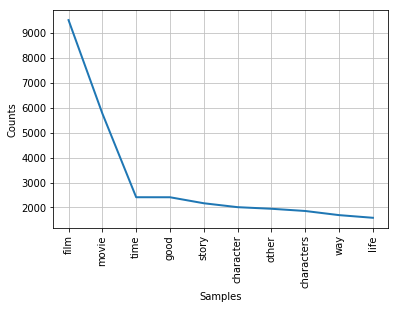

None


In [0]:
print(allwords.plot(10))

In [0]:
wordFeatures = (list(allwords.keys()))[:2000]

In [0]:
def getVectors(wordFeatures, document):
  features = {}
  for w in wordFeatures:
    features[w] = (w in document)
    
  return features

In [0]:
featuresets = [(getVectors(wordFeatures, rev), label) for (rev, label) in finalData]
random.shuffle(featuresets)

In [0]:
print(len(featuresets[0][0]))

2000


In [0]:
print(featuresets[:1])

[({'plot': True, 'teen': False, 'couples': False, 'church': False, 'party': False, 'drink': False, 'drive': False, 'accident': False, 'guys': False, 'girlfriend': False, 'life': False, 'nightmares': False, 'deal': False, 'movie': True, 'critique': False, 'mind': False, 'fuck': False, 'generation': False, 'cool': False, 'idea': False, 'bad': False, 'package': False, 'review': False, 'films': True, 'mold': False, 'mess': False, 'head': False, 'such': False, 'highway': False, 'memento': False, 'good': False, 'ways': False, 'types': False, 'folks': False, 'snag': False, 'neat': False, 'concept': False, 'problems': False, 'main': False, 'problem': False, 'normal': True, 'fantasy': False, 'world': True, 'audience': True, 'member': False, 'dreams': False, 'characters': True, 'dead': False, 'others': False, 'strange': False, 'apparitions': False, 'disappearances': False, 'looooot': False, 'chase': False, 'scenes': False, 'tons': False, 'weird': False, 'things': False, 'most': True, 'don': True

In [0]:
train_data = featuresets[:1500]
test_data = featuresets[1500:]

In [0]:
classifier = NaiveBayesClassifier.train(train_data)

In [0]:
accuracy = nltk.classify.accuracy(classifier, test_data)*100

In [0]:
comment = " I like the movie. It's thrilling and worth watching"

In [0]:
print(accuracy)

82.39999999999999


In [0]:
classification = classifier.classify((getVectors(wordFeatures, comment)))

In [0]:
print(classification)

neg


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
reviews = []
labels = []

for label in movie_reviews.categories():
  for revId in movie_reviews.fileids(label):
    reviews.append(' '.join(list(movie_reviews.words(revId))))
    labels.append(label)

In [0]:
print(reviews[0])

plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what ' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it ' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea

In [0]:
model_mulNB = Pipeline([('vect', CountVectorizer(ngram_range=(2, 4),
                                                stop_words='english',
                                                lowercase=True)),
                       ('tfidf', TfidfTransformer()),
                       ('Multinomial', MultinomialNB())])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=0)

In [0]:
cv = CountVectorizer()
trainVectors = cv.fit_transform(X_train)

In [0]:
a = trainVectors.toarray()

In [0]:
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [0]:
model_mulNB.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(2, 4), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Multinomial',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
classification = model_mulNB.predict([comment])

In [0]:
classification

array(['pos'], dtype='<U3')

In [0]:
from nltk.classify import SklearnClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
model_mulNB = model_mulNB = Pipeline([('tfidf', TfidfTransformer()),
                                      ('chi', SelectKBest(chi2, k=1000)),
                                       ('Multinomial', MultinomialNB())])

In [0]:
classifier = SklearnClassifier(model_mulNB)

In [0]:
classifier.train(train_data)

<SklearnClassifier(Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('chi',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x7fae755c6ea0>)),
                ('Multinomial',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False))>

In [0]:
accuracy = nltk.classify.accuracy(classifier, test_data)*100

In [0]:
accuracy

82.39999999999999

In [0]:
classification = classifier.classify((getVectors(wordFeatures, comment)))

In [0]:
classification

'neg'